In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("final_cleaned_data.csv", sep = ';' )
df.head()

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL,Loudness_norm
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2023-05-29,0.668,0.758,-5.176,0.033,0.483,0.000,...,Artist 1,Eslabon Armado,Nationality 1,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...,0.849862
1,2,WHERE SHE GOES,Bad Bunny,2023-05-29,0.652,0.800,-4.019,0.061,0.143,0.629,...,Artist 1,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,199,199.0,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...,0.883423
2,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",2023-05-29,0.812,0.479,-5.678,0.333,0.213,0.000,...,Artist 1,Yng Lvcas,Nationality 1,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...,0.835301
3,4,Cupid - Twin Ver.,FIFTY FIFTY,2023-05-29,0.783,0.592,-8.332,0.033,0.435,0.000,...,Artist 1,FIFTY FIFTY,Nationality 1,South Korea,Asia,197,197.0,7FbrGaHYVDmfr7KoLIZnQ7,https://open.spotify.com/track/7FbrGaHYVDmfr7K...,0.758318
4,5,un x100to,"Grupo Frontera, Bad Bunny",2023-05-29,0.569,0.724,-4.076,0.047,0.228,0.000,...,Artist 1,Grupo Frontera,Nationality 1,Mexico,Latin-America,196,98.0,6pD0ufEQq0xdHSsRbg9LBK,https://open.spotify.com/track/6pD0ufEQq0xdHSs...,0.881769


In [9]:
# Check the column names in the dataframe
print(df.columns.tolist())
print(f"\nDataframe shape: {df.shape}")

['Rank', 'Title', 'Artists', 'Date', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence', '# of Artist', 'Artist (Ind.)', '# of Nationality', 'Nationality', 'Continent', 'Points (Total)', 'Points (Ind for each Artist/Nat)', 'id', 'Song URL', 'Loudness_norm']

Dataframe shape: (467061, 21)


CALCULATING POPULARITY SCORES

Total unique songs: 9161

Song statistics:
         best_rank  weeks_on_chart
count  9161.000000     9161.000000
mean     87.258160       50.983626
std      58.544799      120.342609
min       1.000000        1.000000
25%      35.000000        2.000000
50%      81.000000        8.000000
75%     135.000000       44.000000
max     200.000000     2251.000000

POPULARITY SCORE STATISTICS

Popularity Score Range: 2.25 - 90.00
Mean:   49.01
Median: 49.75
Std:    28.07

Percentiles:
  10th percentile: 10.25
  25th percentile: 23.00
  50th percentile: 49.75
  75th percentile: 75.75
  90th percentile: 86.50


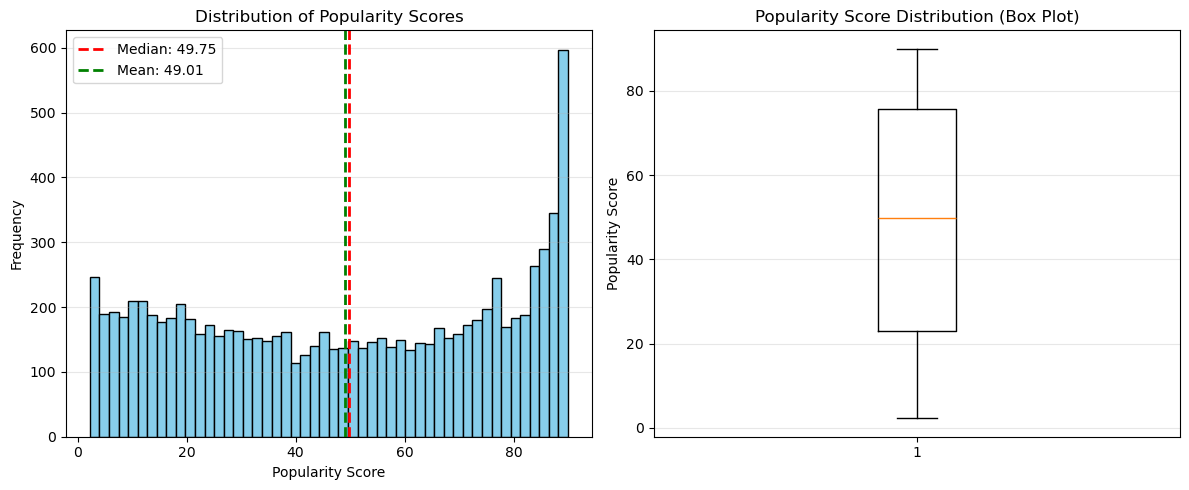


✓ Popularity scores calculated successfully!
✓ Ready to create labels for 9161 unique songs


,id,best_rank,weeks_on_chart,peak_score,longevity_score,popularity_score
0,000xQL6tZNLJzIrtIgxqSl,40,118,80.5,100.0,80.25
1,003VDDA7J3Xb2ZFlNx7nIZ,108,2,46.5,10.0,27.25
2,003eoIwxETJujVWmNFMoZy,91,14,55.0,70.0,55.50
3,003vvx7Niy0yvhvHt4a68B,73,560,64.0,100.0,72.00
4,00B7TZ0Xawar6NZ00JFomN,61,14,70.0,70.0,63.00
5,00Blm7zeNqgYLPtW6zg8cj,7,210,97.0,100.0,88.50
6,00EPIEnX1JFjff8sC6bccd,62,115,69.5,100.0,74.75
7,00ETaeHUQ6lops3oWU1Wrt,89,2,56.0,10.0,32.00
8,00Ga884hbpVvCNyeQdle1U,99,2,51.0,10.0,29.50
9,00I41xsW6SunZDJ5fB8KAd,65,1,68.0,5.0,36.00


In [10]:
# =============================================================================
# STEP 3: CALCULATE POPULARITY SCORES
# =============================================================================

print("="*70)
print("CALCULATING POPULARITY SCORES")
print("="*70)

# Step 1: Aggregate data by song
song_stats = df.groupby(['id']).agg({
    'Rank': 'min',
    'Date': 'nunique'
}).reset_index()
song_stats.columns = ['id', 'best_rank', 'weeks_on_chart']

print(f"\nTotal unique songs: {len(song_stats)}")
print(f"\nSong statistics:")
print(song_stats.describe())

# Step 2: Calculate peak score (based on best rank)
song_stats['peak_score'] = (201 - song_stats['best_rank']) / 200 * 100

# Step 3: Calculate longevity score (based on weeks on chart)
song_stats['longevity_score'] = np.minimum(song_stats['weeks_on_chart'] / 20, 1.0) * 100

# Step 4: Calculate final popularity score (weighted combination)
weight_peak = 0.5
weight_longevity = 0.4
song_stats['popularity_score'] = (
    weight_peak * song_stats['peak_score'] + 
    weight_longevity * song_stats['longevity_score']
)

print(f"\n{'='*70}")
print("POPULARITY SCORE STATISTICS")
print('='*70)
print(f"\nPopularity Score Range: {song_stats['popularity_score'].min():.2f} - {song_stats['popularity_score'].max():.2f}")
print(f"Mean:   {song_stats['popularity_score'].mean():.2f}")
print(f"Median: {song_stats['popularity_score'].median():.2f}")
print(f"Std:    {song_stats['popularity_score'].std():.2f}")

# Display distribution percentiles
print("\nPercentiles:")
for p in [10, 25, 50, 75, 90]:
    val = song_stats['popularity_score'].quantile(p/100)
    print(f"  {p}th percentile: {val:.2f}")

print("="*70)

# Visualize score distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(song_stats['popularity_score'], bins=50, edgecolor='black', color='skyblue')
plt.axvline(song_stats['popularity_score'].median(), color='red', 
            linestyle='--', linewidth=2, label=f'Median: {song_stats["popularity_score"].median():.2f}')
plt.axvline(song_stats['popularity_score'].mean(), color='green', 
            linestyle='--', linewidth=2, label=f'Mean: {song_stats["popularity_score"].mean():.2f}')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Popularity Scores')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(song_stats['popularity_score'], vert=True)
plt.ylabel('Popularity Score')
plt.title('Popularity Score Distribution (Box Plot)')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Popularity scores calculated successfully!")
print(f"✓ Ready to create labels for {len(song_stats)} unique songs")
print("="*70)

song_stats.head(10)

In [11]:
# =============================================================================
# STEP 4: CREATE POPULARITY LABELS (UPDATED - MULTI-CLASS)
# =============================================================================

print("="*70)
print("CREATING POPULARITY LABELS")
print("="*70)

# -----------------------------------------------------------------------------
# OPTION 1: BINARY CLASSIFICATION (Your current approach)
# -----------------------------------------------------------------------------
print("\n1️⃣ BINARY CLASSIFICATION")
print("-" * 70)

threshold_binary = song_stats['popularity_score'].quantile(0.7)
song_stats['popularity_label'] = song_stats['popularity_score'].apply(
    lambda x: 'Popular' if x >= threshold_binary else 'Not Popular'
)

print(f"Threshold: {threshold_binary:.2f}")
print("\nBinary Label Distribution:")
binary_counts = song_stats['popularity_label'].value_counts()
for label, count in binary_counts.items():
    pct = count / len(song_stats) * 100
    print(f"  {label:15s}: {count:5d} ({pct:5.2f}%)")

# -----------------------------------------------------------------------------
# OPTION 2: MULTI-CLASS (4 CLASSES) - QUANTILE-BASED (BALANCED)
# -----------------------------------------------------------------------------
print("\n2️⃣ MULTI-CLASS (QUANTILE-BASED - BALANCED)")
print("-" * 70)

quantiles = song_stats['popularity_score'].quantile([0.25, 0.50, 0.75])

def classify_quantile(score):
    if score >= quantiles[0.75]:
        return 'Very Popular'
    elif score >= quantiles[0.50]:
        return 'Popular'
    elif score >= quantiles[0.25]:
        return 'Moderate'
    else:
        return 'Not Popular'

song_stats['popularity_class'] = song_stats['popularity_score'].apply(classify_quantile)

print("Thresholds:")
print(f"  Not Popular:   score < {quantiles[0.25]:.2f}")
print(f"  Moderate:      {quantiles[0.25]:.2f} ≤ score < {quantiles[0.50]:.2f}")
print(f"  Popular:       {quantiles[0.50]:.2f} ≤ score < {quantiles[0.75]:.2f}")
print(f"  Very Popular:  score ≥ {quantiles[0.75]:.2f}")

print("\nClass Distribution:")
class_counts = song_stats['popularity_class'].value_counts().sort_index()
for class_name, count in class_counts.items():
    pct = count / len(song_stats) * 100
    print(f"  {class_name:15s}: {count:5d} ({pct:5.2f}%)")

# -----------------------------------------------------------------------------
# OPTION 3: MULTI-CLASS (4 TIERS) - THRESHOLD-BASED (INTERPRETABLE)
# -----------------------------------------------------------------------------
print("\n3️⃣ MULTI-CLASS (THRESHOLD-BASED - INTERPRETABLE)")
print("-" * 70)

def classify_threshold(score):
    if score >= 80:
        return 'Mega Hit'
    elif score >= 60:
        return 'Popular'
    elif score >= 40:
        return 'Moderate'
    else:
        return 'Unpopular'

song_stats['popularity_tier'] = song_stats['popularity_score'].apply(classify_threshold)

print("Thresholds:")
print("  Unpopular:    score < 40")
print("  Moderate:     40 ≤ score < 60")
print("  Popular:      60 ≤ score < 80")
print("  Mega Hit:     score ≥ 80")

print("\nTier Distribution:")
tier_counts = song_stats['popularity_tier'].value_counts().sort_index()
for tier_name, count in tier_counts.items():
    pct = count / len(song_stats) * 100
    print(f"  {tier_name:15s}: {count:5d} ({pct:5.2f}%)")

# -----------------------------------------------------------------------------
# OPTION 4: 3-CLASS VERSION (SIMPLIFIED)
# -----------------------------------------------------------------------------
print("\n4️⃣ 3-CLASS (SIMPLIFIED)")
print("-" * 70)

quantiles_3 = song_stats['popularity_score'].quantile([0.33, 0.67])

def classify_3class(score):
    if score >= quantiles_3[0.67]:
        return 'High'
    elif score >= quantiles_3[0.33]:
        return 'Medium'
    else:
        return 'Low'

song_stats['popularity_3class'] = song_stats['popularity_score'].apply(classify_3class)

print("Thresholds:")
print(f"  Low:      score < {quantiles_3[0.33]:.2f}")
print(f"  Medium:   {quantiles_3[0.33]:.2f} ≤ score < {quantiles_3[0.67]:.2f}")
print(f"  High:     score ≥ {quantiles_3[0.67]:.2f}")

print("\nClass Distribution:")
class3_counts = song_stats['popularity_3class'].value_counts().sort_index()
for class_name, count in class3_counts.items():
    pct = count / len(song_stats) * 100
    print(f"  {class_name:15s}: {count:5d} ({pct:5.2f}%)")

# -----------------------------------------------------------------------------
# SUMMARY
# -----------------------------------------------------------------------------
print("\n" + "="*70)
print("📊 LABELING SUMMARY")
print("="*70)
print(f"\nTotal unique songs: {len(song_stats)}")
print(f"\nLabels created:")
print(f"  1. popularity_label   → Binary (2 classes)")
print(f"  2. popularity_class   → 4-class quantile (balanced)")
print(f"  3. popularity_tier    → 4-tier threshold (interpretable)")
print(f"  4. popularity_3class  → 3-class quantile (simplified)")
print(f"  5. popularity_score   → Continuous (0-100) for regression")
print("="*70)

song_stats.head(10)

CREATING POPULARITY LABELS

1️⃣ BINARY CLASSIFICATION
----------------------------------------------------------------------
Threshold: 71.50

Binary Label Distribution:
  Not Popular    :  6391 (69.76%)
  Popular        :  2770 (30.24%)

2️⃣ MULTI-CLASS (QUANTILE-BASED - BALANCED)
----------------------------------------------------------------------
Thresholds:
  Not Popular:   score < 23.00
  Moderate:      23.00 ≤ score < 49.75
  Popular:       49.75 ≤ score < 75.75
  Very Popular:  score ≥ 75.75

Class Distribution:
  Moderate       :  2279 (24.88%)
  Not Popular    :  2284 (24.93%)
  Popular        :  2293 (25.03%)
  Very Popular   :  2305 (25.16%)

3️⃣ MULTI-CLASS (THRESHOLD-BASED - INTERPRETABLE)
----------------------------------------------------------------------
Thresholds:
  Unpopular:    score < 40
  Moderate:     40 ≤ score < 60
  Popular:      60 ≤ score < 80
  Mega Hit:     score ≥ 80

Tier Distribution:
  Mega Hit       :  1816 (19.82%)
  Moderate       :  1618 (17.66

,id,best_rank,weeks_on_chart,peak_score,longevity_score,popularity_score,popularity_label,popularity_class,popularity_tier,popularity_3class
0,000xQL6tZNLJzIrtIgxqSl,40,118,80.5,100.0,80.25,Popular,Very Popular,Mega Hit,High
1,003VDDA7J3Xb2ZFlNx7nIZ,108,2,46.5,10.0,27.25,Not Popular,Moderate,Unpopular,Low
2,003eoIwxETJujVWmNFMoZy,91,14,55.0,70.0,55.50,Not Popular,Popular,Moderate,Medium
3,003vvx7Niy0yvhvHt4a68B,73,560,64.0,100.0,72.00,Popular,Popular,Popular,High
4,00B7TZ0Xawar6NZ00JFomN,61,14,70.0,70.0,63.00,Not Popular,Popular,Popular,Medium
5,00Blm7zeNqgYLPtW6zg8cj,7,210,97.0,100.0,88.50,Popular,Very Popular,Mega Hit,High
6,00EPIEnX1JFjff8sC6bccd,62,115,69.5,100.0,74.75,Popular,Popular,Popular,High
7,00ETaeHUQ6lops3oWU1Wrt,89,2,56.0,10.0,32.00,Not Popular,Moderate,Unpopular,Medium
8,00Ga884hbpVvCNyeQdle1U,99,2,51.0,10.0,29.50,Not Popular,Moderate,Unpopular,Low
9,00I41xsW6SunZDJ5fB8KAd,65,1,68.0,5.0,36.00,Not Popular,Moderate,Unpopular,Medium


In [12]:
df.head()

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL,Loudness_norm
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2023-05-29,0.668,0.758,-5.176,0.033,0.483,0.000,...,Artist 1,Eslabon Armado,Nationality 1,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...,0.849862
1,2,WHERE SHE GOES,Bad Bunny,2023-05-29,0.652,0.800,-4.019,0.061,0.143,0.629,...,Artist 1,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,199,199.0,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...,0.883423
2,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",2023-05-29,0.812,0.479,-5.678,0.333,0.213,0.000,...,Artist 1,Yng Lvcas,Nationality 1,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...,0.835301
3,4,Cupid - Twin Ver.,FIFTY FIFTY,2023-05-29,0.783,0.592,-8.332,0.033,0.435,0.000,...,Artist 1,FIFTY FIFTY,Nationality 1,South Korea,Asia,197,197.0,7FbrGaHYVDmfr7KoLIZnQ7,https://open.spotify.com/track/7FbrGaHYVDmfr7K...,0.758318
4,5,un x100to,"Grupo Frontera, Bad Bunny",2023-05-29,0.569,0.724,-4.076,0.047,0.228,0.000,...,Artist 1,Grupo Frontera,Nationality 1,Mexico,Latin-America,196,98.0,6pD0ufEQq0xdHSsRbg9LBK,https://open.spotify.com/track/6pD0ufEQq0xdHSs...,0.881769


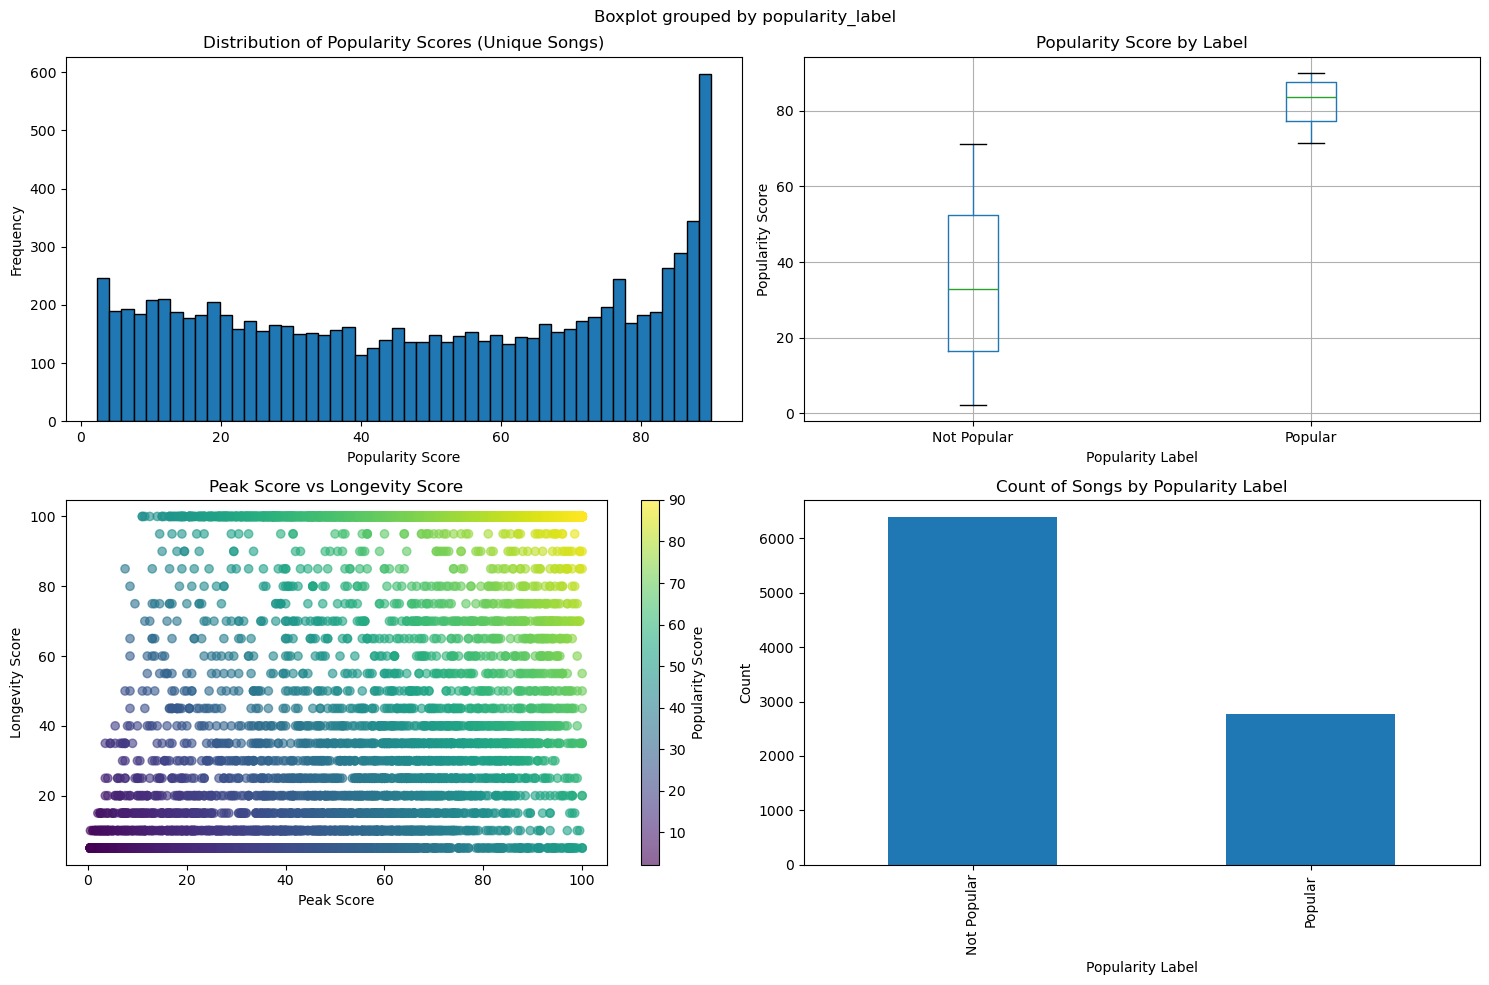

In [13]:
# Visualizations on unique songs
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram of popularity scores
axes[0, 0].hist(song_stats['popularity_score'], bins=50, edgecolor='black')
axes[0, 0].set_title('Distribution of Popularity Scores (Unique Songs)')
axes[0, 0].set_xlabel('Popularity Score')
axes[0, 0].set_ylabel('Frequency')

# Box plot by label
song_stats.boxplot(column='popularity_score', by='popularity_label', ax=axes[0, 1])
axes[0, 1].set_title('Popularity Score by Label')
axes[0, 1].set_xlabel('Popularity Label')
axes[0, 1].set_ylabel('Popularity Score')

# Scatter plot: peak vs longevity
scatter = axes[1, 0].scatter(song_stats['peak_score'], song_stats['longevity_score'], 
                             c=song_stats['popularity_score'], cmap='viridis', alpha=0.6)
axes[1, 0].set_title('Peak Score vs Longevity Score')
axes[1, 0].set_xlabel('Peak Score')
axes[1, 0].set_ylabel('Longevity Score')
plt.colorbar(scatter, ax=axes[1, 0], label='Popularity Score')

# Count plot of labels
song_stats['popularity_label'].value_counts().plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Count of Songs by Popularity Label')
axes[1, 1].set_xlabel('Popularity Label')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

/var/folders/x5/zzblr9b953sdk5tscmgtnzl80000gn/T/ipykernel_12461/2925343291.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(class4_order, rotation=15, ha='right')


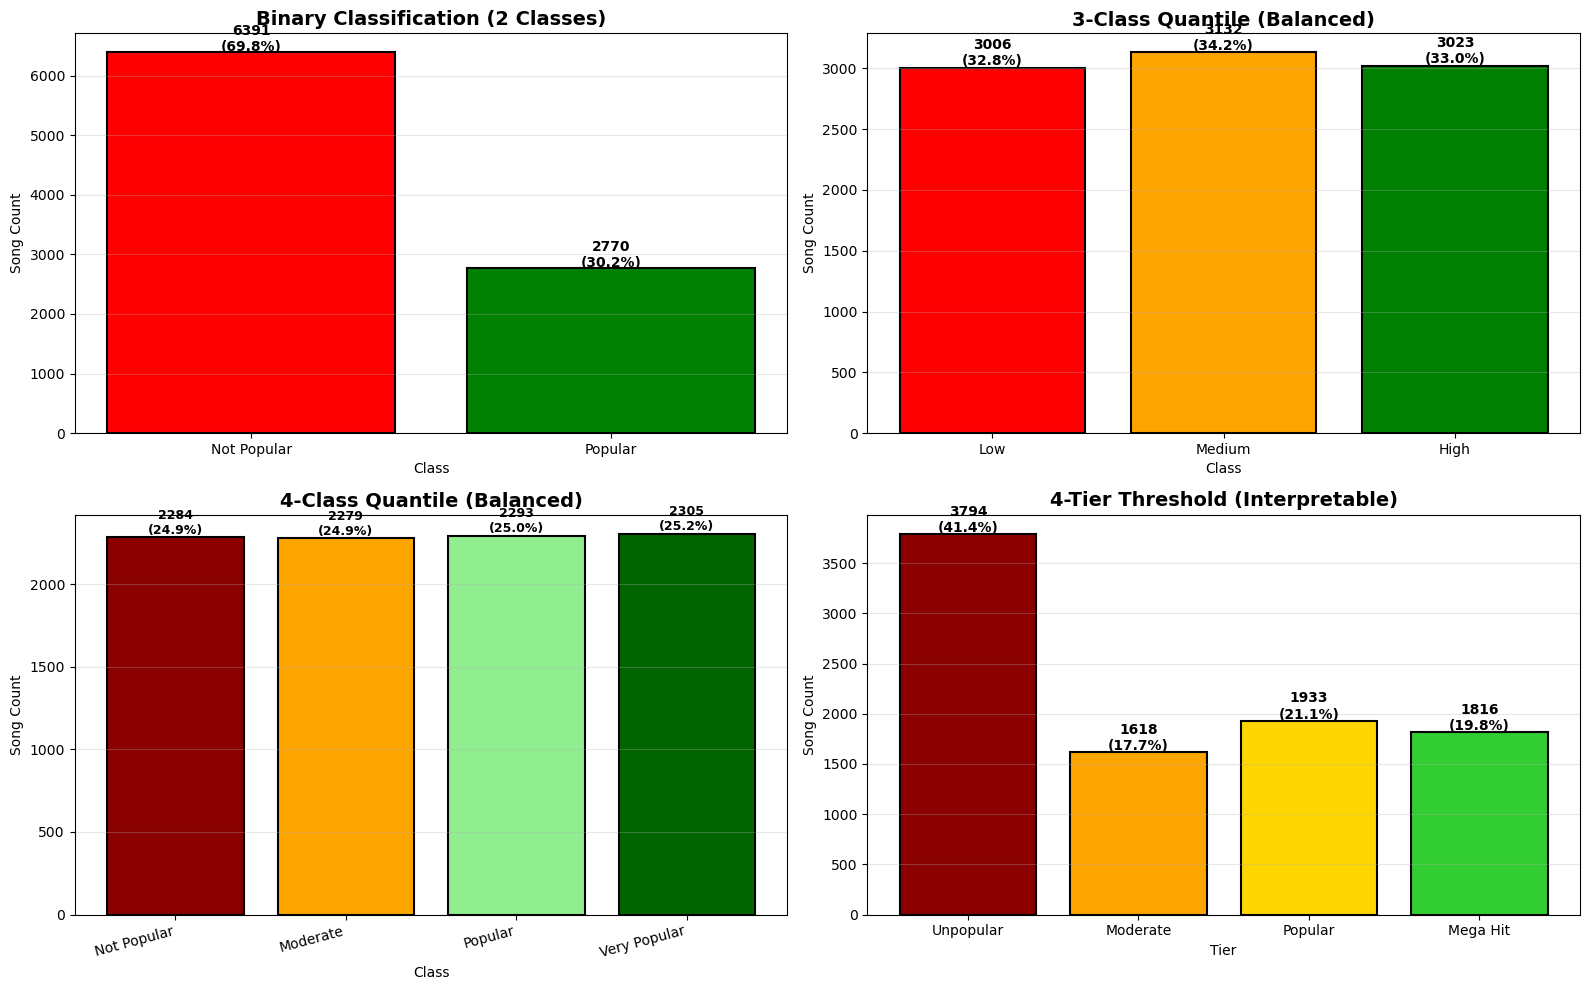

In [14]:
# =============================================================================
# VISUALIZE ALL LABELING APPROACHES
# =============================================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: Binary Classification
binary_counts = song_stats['popularity_label'].value_counts()
colors_binary = ['red', 'green']
axes[0, 0].bar(binary_counts.index, binary_counts.values, color=colors_binary, 
               edgecolor='black', linewidth=1.5)
axes[0, 0].set_title('Binary Classification (2 Classes)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Class')
axes[0, 0].set_ylabel('Song Count')
axes[0, 0].grid(axis='y', alpha=0.3)
for i, (label, count) in enumerate(binary_counts.items()):
    pct = count / len(song_stats) * 100
    axes[0, 0].text(i, count + 20, f'{count}\n({pct:.1f}%)', 
                    ha='center', fontweight='bold', fontsize=10)

# Plot 2: 3-Class
class3_order = ['Low', 'Medium', 'High']
class3_counts = song_stats['popularity_3class'].value_counts().reindex(class3_order)
colors_3 = ['red', 'orange', 'green']
axes[0, 1].bar(class3_order, class3_counts.values, color=colors_3, 
               edgecolor='black', linewidth=1.5)
axes[0, 1].set_title('3-Class Quantile (Balanced)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Class')
axes[0, 1].set_ylabel('Song Count')
axes[0, 1].grid(axis='y', alpha=0.3)
for i, count in enumerate(class3_counts.values):
    pct = count / len(song_stats) * 100
    axes[0, 1].text(i, count + 20, f'{count}\n({pct:.1f}%)', 
                    ha='center', fontweight='bold', fontsize=10)

# Plot 3: 4-Class Quantile
class4_order = ['Not Popular', 'Moderate', 'Popular', 'Very Popular']
class4_counts = song_stats['popularity_class'].value_counts().reindex(class4_order)
colors_4q = ['darkred', 'orange', 'lightgreen', 'darkgreen']
axes[1, 0].bar(class4_order, class4_counts.values, color=colors_4q, 
               edgecolor='black', linewidth=1.5)
axes[1, 0].set_title('4-Class Quantile (Balanced)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Class')
axes[1, 0].set_ylabel('Song Count')
axes[1, 0].set_xticklabels(class4_order, rotation=15, ha='right')
axes[1, 0].grid(axis='y', alpha=0.3)
for i, count in enumerate(class4_counts.values):
    pct = count / len(song_stats) * 100
    axes[1, 0].text(i, count + 20, f'{count}\n({pct:.1f}%)', 
                    ha='center', fontweight='bold', fontsize=9)

# Plot 4: 4-Tier Threshold
tier_order = ['Unpopular', 'Moderate', 'Popular', 'Mega Hit']
tier_counts = song_stats['popularity_tier'].value_counts().reindex(tier_order)
colors_4t = ['darkred', 'orange', 'gold', 'limegreen']
axes[1, 1].bar(tier_order, tier_counts.values, color=colors_4t, 
               edgecolor='black', linewidth=1.5)
axes[1, 1].set_title('4-Tier Threshold (Interpretable)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Tier')
axes[1, 1].set_ylabel('Song Count')
axes[1, 1].grid(axis='y', alpha=0.3)
for i, count in enumerate(tier_counts.values):
    pct = count / len(song_stats) * 100
    axes[1, 1].text(i, count + 20, f'{count}\n({pct:.1f}%)', 
                    ha='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

/var/folders/x5/zzblr9b953sdk5tscmgtnzl80000gn/T/ipykernel_12461/2925343291.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(class4_order, rotation=15, ha='right')


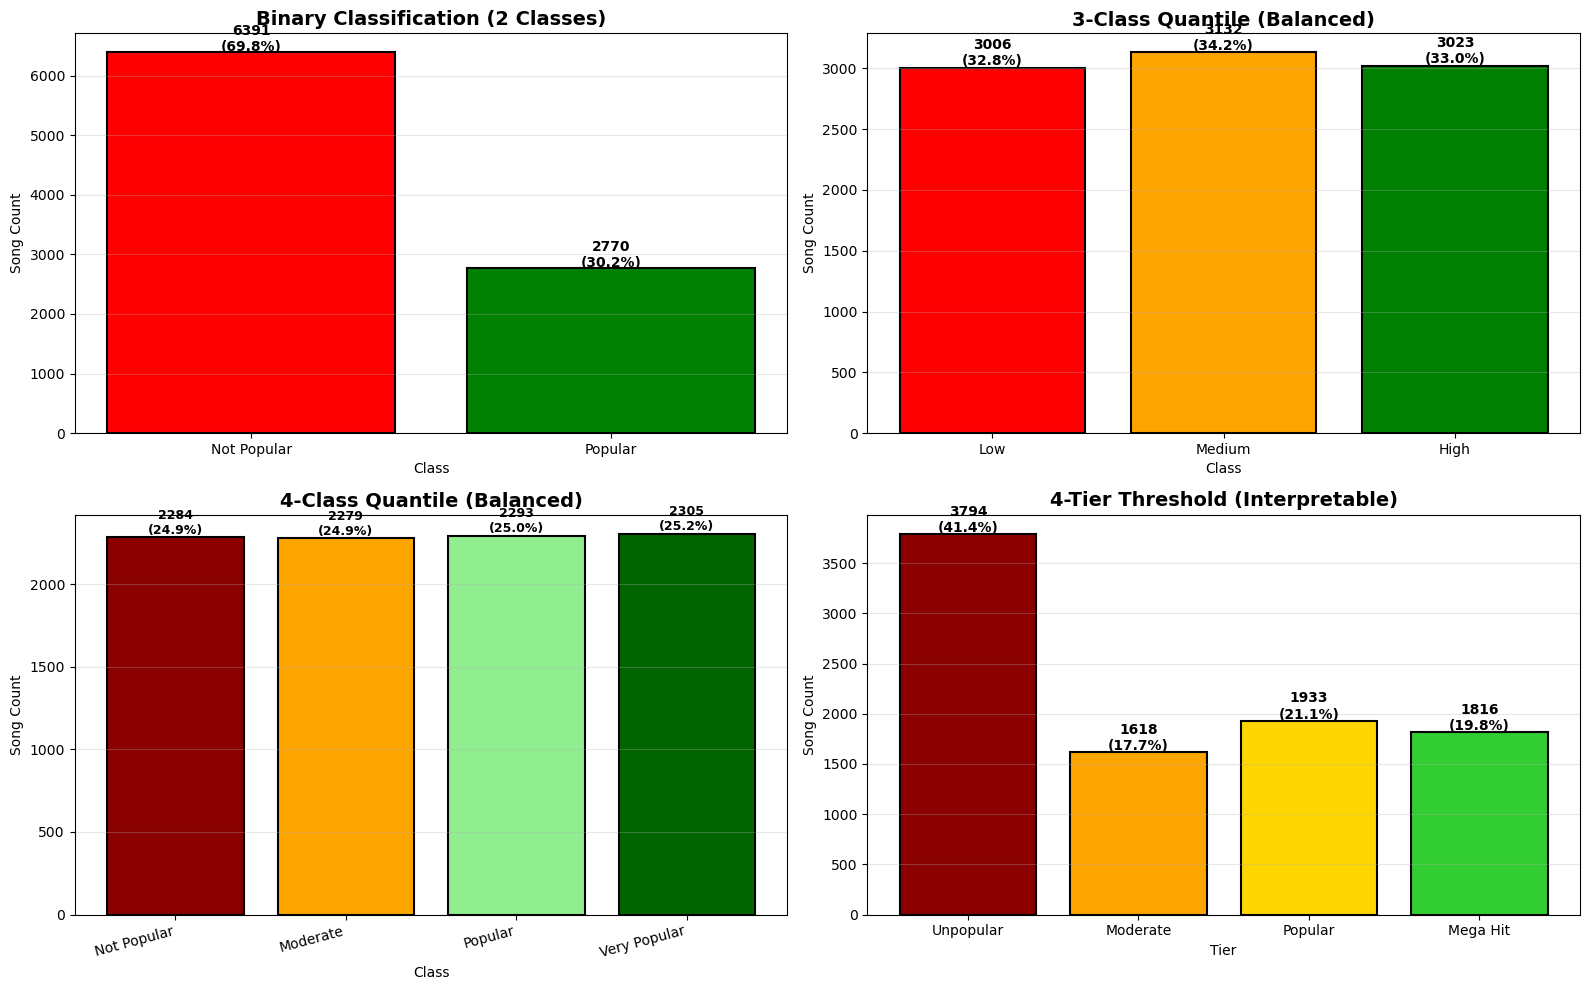

In [15]:
# =============================================================================
# VISUALIZE ALL LABELING APPROACHES
# =============================================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: Binary Classification
binary_counts = song_stats['popularity_label'].value_counts()
colors_binary = ['red', 'green']
axes[0, 0].bar(binary_counts.index, binary_counts.values, color=colors_binary, 
               edgecolor='black', linewidth=1.5)
axes[0, 0].set_title('Binary Classification (2 Classes)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Class')
axes[0, 0].set_ylabel('Song Count')
axes[0, 0].grid(axis='y', alpha=0.3)
for i, (label, count) in enumerate(binary_counts.items()):
    pct = count / len(song_stats) * 100
    axes[0, 0].text(i, count + 20, f'{count}\n({pct:.1f}%)', 
                    ha='center', fontweight='bold', fontsize=10)

# Plot 2: 3-Class
class3_order = ['Low', 'Medium', 'High']
class3_counts = song_stats['popularity_3class'].value_counts().reindex(class3_order)
colors_3 = ['red', 'orange', 'green']
axes[0, 1].bar(class3_order, class3_counts.values, color=colors_3, 
               edgecolor='black', linewidth=1.5)
axes[0, 1].set_title('3-Class Quantile (Balanced)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Class')
axes[0, 1].set_ylabel('Song Count')
axes[0, 1].grid(axis='y', alpha=0.3)
for i, count in enumerate(class3_counts.values):
    pct = count / len(song_stats) * 100
    axes[0, 1].text(i, count + 20, f'{count}\n({pct:.1f}%)', 
                    ha='center', fontweight='bold', fontsize=10)

# Plot 3: 4-Class Quantile
class4_order = ['Not Popular', 'Moderate', 'Popular', 'Very Popular']
class4_counts = song_stats['popularity_class'].value_counts().reindex(class4_order)
colors_4q = ['darkred', 'orange', 'lightgreen', 'darkgreen']
axes[1, 0].bar(class4_order, class4_counts.values, color=colors_4q, 
               edgecolor='black', linewidth=1.5)
axes[1, 0].set_title('4-Class Quantile (Balanced)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Class')
axes[1, 0].set_ylabel('Song Count')
axes[1, 0].set_xticklabels(class4_order, rotation=15, ha='right')
axes[1, 0].grid(axis='y', alpha=0.3)
for i, count in enumerate(class4_counts.values):
    pct = count / len(song_stats) * 100
    axes[1, 0].text(i, count + 20, f'{count}\n({pct:.1f}%)', 
                    ha='center', fontweight='bold', fontsize=9)

# Plot 4: 4-Tier Threshold
tier_order = ['Unpopular', 'Moderate', 'Popular', 'Mega Hit']
tier_counts = song_stats['popularity_tier'].value_counts().reindex(tier_order)
colors_4t = ['darkred', 'orange', 'gold', 'limegreen']
axes[1, 1].bar(tier_order, tier_counts.values, color=colors_4t, 
               edgecolor='black', linewidth=1.5)
axes[1, 1].set_title('4-Tier Threshold (Interpretable)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Tier')
axes[1, 1].set_ylabel('Song Count')
axes[1, 1].grid(axis='y', alpha=0.3)
for i, count in enumerate(tier_counts.values):
    pct = count / len(song_stats) * 100
    axes[1, 1].text(i, count + 20, f'{count}\n({pct:.1f}%)', 
                    ha='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

In [16]:
# =============================================================================
# SAVE ML-READY DATASET WITH ALL LABELS
# =============================================================================

print("\n" + "="*70)
print("CREATING ML-READY DATASET")
print("="*70)

# Create ML-ready dataset
ml_ready = df.groupby('id').first().reset_index()

# Merge with ALL labels
ml_ready = ml_ready.merge(
    song_stats[['id', 'best_rank', 'weeks_on_chart', 'peak_score', 
                'longevity_score', 'popularity_score', 
                'popularity_label', 'popularity_class', 
                'popularity_tier', 'popularity_3class']],
    on='id', 
    how='inner'
)

# Select columns
feature_columns = [
    'id', 'Title', 'Artists', 
    'Danceability', 'Energy', 'Loudness', 'Speechiness', 
    'Acousticness', 'Instrumentalness', 'Valence', 
    '# of Artist', '# of Nationality', 'Loudness_norm',
    'best_rank', 'weeks_on_chart', 'peak_score', 'longevity_score',
    'popularity_score',      # Regression
    'popularity_label',      # Binary
    'popularity_class',      # 4-class balanced
    'popularity_tier',       # 4-tier interpretable
    'popularity_3class'      # 3-class simplified
]

ml_ready = ml_ready[feature_columns]

# Save
ml_ready.to_csv('ml_ready_with_features_Multiclass.csv', sep=';', index=False)

print(f"\n✅ Saved: ml_ready_with_features_Multiclass.csv")
print(f"   Shape: {ml_ready.shape}")
print(f"   Unique songs: {len(ml_ready):,}")

print("\n📋 Available Targets:")
print("   1. popularity_score   → Regression (continuous 0-100)")
print("   2. popularity_label   → Binary (Popular / Not Popular)")
print("   3. popularity_3class  → 3-Class (Low / Medium / High)")
print("   4. popularity_class   → 4-Class balanced")
print("   5. popularity_tier    → 4-Tier interpretable")

print("\n🎯 Recommended for Multi-Class:")
print("   • Use 'popularity_class' for balanced training")
print("   • Use 'popularity_tier' for interpretable results")
print("   • Use 'popularity_3class' for simplicity")

print("="*70)

ml_ready.head(10)


CREATING ML-READY DATASET

✅ Saved: ml_ready_with_features_Multiclass.csv
   Shape: (9161, 22)
   Unique songs: 9,161

📋 Available Targets:
   1. popularity_score   → Regression (continuous 0-100)
   2. popularity_label   → Binary (Popular / Not Popular)
   3. popularity_3class  → 3-Class (Low / Medium / High)
   4. popularity_class   → 4-Class balanced
   5. popularity_tier    → 4-Tier interpretable

🎯 Recommended for Multi-Class:
   • Use 'popularity_class' for balanced training
   • Use 'popularity_tier' for interpretable results
   • Use 'popularity_3class' for simplicity


,id,Title,Artists,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,...,Loudness_norm,best_rank,weeks_on_chart,peak_score,longevity_score,popularity_score,popularity_label,popularity_class,popularity_tier,popularity_3class
0,000xQL6tZNLJzIrtIgxqSl,Still Got Time (feat. PARTYNEXTDOOR),ZAYN,0.748,0.627,-6.029,0.064,0.131,0.0,0.524,...,0.825120,40,118,80.5,100.0,80.25,Popular,Very Popular,Mega Hit,High
1,003VDDA7J3Xb2ZFlNx7nIZ,YELL OH,"Trippie Redd, Young Thug",0.842,0.578,-6.050,0.138,0.004,0.0,0.190,...,0.824511,108,2,46.5,10.0,27.25,Not Popular,Moderate,Unpopular,Low
2,003eoIwxETJujVWmNFMoZy,Growing Pains,Alessia Cara,0.353,0.755,-6.276,0.733,0.082,0.0,0.437,...,0.817955,91,14,55.0,70.0,55.50,Not Popular,Popular,Moderate,Medium
3,003vvx7Niy0yvhvHt4a68B,Mr. Brightside,The Killers,0.352,0.911,-5.230,0.075,0.001,0.0,0.236,...,0.848296,73,560,64.0,100.0,72.00,Popular,Popular,Popular,High
4,00B7TZ0Xawar6NZ00JFomN,Best Life (feat. Chance The Rapper),Cardi B,0.620,0.625,-7.438,0.553,0.287,0.0,0.665,...,0.784249,61,14,70.0,70.0,63.00,Not Popular,Popular,Popular,Medium
5,00Blm7zeNqgYLPtW6zg8cj,One Right Now (with The Weeknd),"Post Malone, The Weeknd",0.687,0.781,-4.806,0.053,0.036,0.0,0.688,...,0.860595,7,210,97.0,100.0,88.50,Popular,Very Popular,Mega Hit,High
6,00EPIEnX1JFjff8sC6bccd,No Me Acuerdo,"Thalia, Natti Natasha",0.836,0.799,-4.247,0.087,0.187,0.0,0.772,...,0.876809,62,115,69.5,100.0,74.75,Popular,Popular,Popular,High
7,00ETaeHUQ6lops3oWU1Wrt,Hot Stuff,"Kygo, Donna Summer",0.681,0.773,-5.749,0.148,0.019,0.0,0.429,...,0.833241,89,2,56.0,10.0,32.00,Not Popular,Moderate,Unpopular,Medium
8,00Ga884hbpVvCNyeQdle1U,Violet Chemistry,Miley Cyrus,0.642,0.715,-5.711,0.039,0.003,0.0,0.588,...,0.834344,99,2,51.0,10.0,29.50,Not Popular,Moderate,Unpopular,Low
9,00I41xsW6SunZDJ5fB8KAd,Safety Zone,j-hope,0.676,0.742,-5.017,0.162,0.561,0.0,0.694,...,0.854474,65,1,68.0,5.0,36.00,Not Popular,Moderate,Unpopular,Medium
